# Group Project - Social Media Stock Analysis and Visualization

#### "Business & Finance" Project Team:
- Reid Gaede
- [*Group Member Name Removed Pending Authorization of Online Name Publication*]
- [*Group Member Name Removed Pending Authorization of Online Name Publication*]
- [*Group Member Name Removed Pending Authorization of Online Name Publication*]

## Introduction

The Business & Finance team has tasked itself with evaluating, using the dataset at its disposal and its accumulated knowledge of Python, pandas, Scikit-learn, etc., social media stocks as investment opportunities. The five stocks under evaluation are:

- Etsy (ETSY)
- Facebook (FB)
- Pinterest (PINS)
- Snap Inc. (SNAP)
- Twitter (TWTR)

This evaluation is being performed on behalf of a hypothetical potential investor. The investor currently has no exposure to social media stocks, but perceives the sector as one primed for low-risk growth over the short-/medium-term. Our potential investor is unique in that they only wish to invest in _one_ company's stock as opposed to diversifying across the sector. As such, it is the project team's responsibility to evaluate the five stocks listed above to find the one that best fits our potential investor's profile.

The project team has been provided a dataset of social media stock prices to explore, clean, analyze, and visualize in order to inform and support their investment recommendation. The dataset was found on Kaggle, and can be accessed at the following URL: https://www.kaggle.com/datasets/prasertk/social-media-stock-prices

### Project Objective:

To identify, using the dataset at our disposal and our accumulated knowledge of Python, pandas, Scikit-learn, etc., a single social media stock that best fits the investment profile of our hypothetical potential investor.

## Data Exploration & Cleaning

Before the project team can dive into analyzing and visualizing this dataset, it must explore the data at a high level to understand any nuances unique to said data. During and after exploration, the team must hygiene the data to ensure that any errors are removed and the data are usable in upcoming analysis and visualization efforts.

We begin the data cleaning/exploration process by importing the `pandas` and `numpy` libraries into our Notebook. So as to maximize this Notebook's portability if it and the input dataset are added to, say, a GitHub repository, we additionally import the `os` and `glob` modules into our Notebook. Doing so allows us to make use of the `.glob()` method, which we use to obtain a list of files in the "GroupProject_StockPriceAnalysisAndVisualization" directory that end with the `.csv` file extension (since there is only one such file in the directory - `social media stocks 2012-2022.csv` - we can effectively "grab" the `social media stocks 2012-2022.csv` input dataset via `.glob()`), and then use `os.path.abspath` to obtain the absolute path for the input dataset contained in that list.

Once we have obtained the absolute path for `social media stocks 2012-2022.csv`, we then read the dataset into pandas and review the DataFrame's first few lines using the `.head()` method:

In [1]:
import pandas as pd
import numpy as np
import glob
import os

# Note that output of `glob.glob()` is inherently a list (even if said 
# `glob.glob()` invocation only returns a single file name):
csvFileList = glob.glob("*.csv")

# Obtaining first (and only) file name stored in `csvFileList` list, and 
# then using `os.path.abspath` to obtain absolute file path cor-
# responding to said file name:
filepath = os.path.abspath(csvFileList[0])

socMediaData = pd.read_csv(filepath)
socMediaData.head(3)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.00,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.66,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.59,30.940001,32.610001,101786600.0


Using the `.info()` method, we check each column's data type, as well as each column's count of non-null values.

The output below reveals zero null values, and that all data in the DataFrame - with the exception of the "object"-structured data in the "Date" column - are structured as we would expect them to be.

In [2]:
socMediaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8193 non-null   object 
 1   Symbol     8193 non-null   object 
 2   Adj Close  8193 non-null   float64
 3   Close      8193 non-null   float64
 4   High       8193 non-null   float64
 5   Low        8193 non-null   float64
 6   Open       8193 non-null   float64
 7   Volume     8193 non-null   float64
dtypes: float64(6), object(2)
memory usage: 512.2+ KB


Data visualization later in this Notebook requires that we change the values in the "Date" column from the "object" data type to the "datetime64[ns]" data type.

To convert the "object"-structured values in the "Date" column to "datetime64[ns]"-structured values, we call the `.to_datetime()` method on the "Date" column:

In [3]:
socMediaData['Date'] = pd.to_datetime(socMediaData['Date'])
socMediaData.dtypes

Date         datetime64[ns]
Symbol               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object

Using the `.value_counts()` method, we can output the number of rows within the DataFrame containing each unique "Symbol" value. In this case, calling `.value_counts()` reveals that each stock appears a different number of times in the DataFrame, and that Pinterest (PINS) appears the least among the unique stocks.

In [4]:
# Listing ticker symbols and counts for each symbol:
socMediaData['Symbol'].value_counts()

FB      2447
TWTR    2077
ETSY    1717
SNAP    1244
PINS     708
Name: Symbol, dtype: int64

After grouping the DataFrame by the unique values in the "Symbol" column using the `.groupby()` method, we use the `.min()` method on the "Date" column to determine the earliest recorded row for each stock.

Our output reveals that Pinterest (PINS)'s earliest appearance in the DataFrame is later than the earliest appearance for all other stocks in the DataFrame, which suggests that the company's stock began trading most recently out of the stocks detailed in the DataFrame.

Pinterest's ostensibly later entry into public equity markets explains the significant discrepancy in the number of rows ascribable to it when compared to the other stocks appearing in the DataFrame.

In [5]:
minDate = socMediaData.groupby('Symbol')
minDate['Date'].min()

Symbol
ETSY   2015-04-16
FB     2012-05-18
PINS   2019-04-18
SNAP   2017-03-02
TWTR   2013-11-07
Name: Date, dtype: datetime64[ns]

In [6]:
# Confirming all stocks have common "end date":
maxDate = socMediaData.groupby('Symbol')
maxDate['Date'].max()

Symbol
ETSY   2022-02-07
FB     2022-02-07
PINS   2022-02-07
SNAP   2022-02-07
TWTR   2022-02-07
Name: Date, dtype: datetime64[ns]

To ensure integrity of analyses and visualizations, we narrow the DataFrame to a subset that reflects a common timeframe across the five stocks.

Based on experience-driven preference for clean month-end dates over intra-month points, the group established the period from `2019-04-30` to `2022-01-31` as the common timeframe for analysis and visualization.

In [7]:
socMediaDataCommon = socMediaData.loc[
    (socMediaData['Date'] >= '2019-04-30') & 
    (socMediaData['Date'] <= '2022-01-31'), :
    ]

# Previewing top of DataFrame to confirm rows 
# exhibit narrowed timeframe's earliest dates:
socMediaDataCommon.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
4688,2019-04-30,FB,193.399994,193.399994,197.389999,192.279999,194.190002,23494700.0
4689,2019-04-30,TWTR,39.910000,39.910000,40.919998,39.650002,39.790001,22912000.0
4690,2019-04-30,PINS,30.980000,30.980000,35.290001,30.530001,35.200001,35885700.0
4691,2019-04-30,SNAP,11.140000,11.140000,11.370000,11.020000,11.160000,17017900.0
4692,2019-04-30,ETSY,67.540001,67.540001,69.785004,65.809998,69.129997,2391700.0


In [8]:
# Previewing tail of DataFrame to confirm rows 
# exhibit narrowed timeframe's most-recent 
# dates:
socMediaDataCommon.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
8163,2022-01-31,FB,313.260010,313.260010,313.790009,299.320007,300.679993,21579500.0
8164,2022-01-31,TWTR,37.509998,37.509998,37.560001,35.340000,35.430000,17558300.0
8165,2022-01-31,PINS,29.559999,29.559999,29.820000,27.120001,27.120001,14108700.0
8166,2022-01-31,SNAP,32.540001,32.540001,32.630001,30.650000,30.650000,25872900.0
8167,2022-01-31,ETSY,157.080002,157.080002,157.419998,146.330002,146.619995,3465200.0


In [9]:
# Confirming that each "Symbol-group" has same 
# number of entries in narrowed timeframe:
socMediaDataCommon.groupby('Symbol').size()

Symbol
ETSY    696
FB      696
PINS    696
SNAP    696
TWTR    696
dtype: int64

In preparation for visualization and analysis, we first sort the DataFrame embodying the narrowed timeframe by the unique values in the "Symbol" column, and then sort each resulting "Symbol-group" by their "Date" values:

In [10]:
commonSMData = socMediaDataCommon.sort_values(['Symbol', 'Date'])

# Previewing top of DataFrame to confirm rows sorted by "Symbol" 
# and then by "Date":
commonSMData.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
4692,2019-04-30,ETSY,67.540001,67.540001,69.785004,65.809998,69.129997,2391700.0
4697,2019-05-01,ETSY,66.790001,66.790001,68.720001,66.739998,68.089996,1671800.0
4702,2019-05-02,ETSY,68.070000,68.070000,68.095001,65.750000,66.629997,1365500.0
4707,2019-05-03,ETSY,69.650002,69.650002,70.089996,67.825996,68.900002,1579600.0
4712,2019-05-06,ETSY,69.029999,69.029999,69.430000,67.400002,67.930000,1772200.0


In [11]:
# Previewing bottom of DataFrame to confirm rows sorted by "Symbol" 
# and then by "Date":
commonSMData.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
8144,2022-01-25,TWTR,34.169998,34.169998,34.990002,33.619999,34.220001,19205800.0
8149,2022-01-26,TWTR,33.619999,33.619999,35.430000,33.270000,34.970001,21377900.0
8154,2022-01-27,TWTR,33.840000,33.840000,35.139999,33.810001,34.139999,16637300.0
8159,2022-01-28,TWTR,35.270000,35.270000,35.299999,33.599998,33.790001,14368700.0
8164,2022-01-31,TWTR,37.509998,37.509998,37.560001,35.340000,35.430000,17558300.0


To ensure data integrity, we call the `.info()` method to ensure there are no missing/null values within our DataFrame embodying the narrowed timeframe.

We call `.info()` expecting that the memory usage for the DataFrame embodying the narrowed timeframe will be lower than that of the original DataFrame bound to the variable name "socMediaData". We also expect that `.info()` will demonstrate that "commonSMData" is a DataFrame. Our expectations are met. 

In [12]:
commonSMData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 4692 to 8164
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3480 non-null   datetime64[ns]
 1   Symbol     3480 non-null   object        
 2   Adj Close  3480 non-null   float64       
 3   Close      3480 non-null   float64       
 4   High       3480 non-null   float64       
 5   Low        3480 non-null   float64       
 6   Open       3480 non-null   float64       
 7   Volume     3480 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 244.7+ KB


As a final cleaning check, we use the `.describe()` method to visually confirm that the minimum, maximum, etc. values for each column in the DataFrame do not indicate the presence of any exceptional outlier values (such as, for example, `-9999` in place of a null value).

In [13]:
commonSMData.describe()

,Adj Close,Close,High,Low,Open,Volume
count,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3.480000e+03
mean,102.148434,102.148434,103.968283,100.274293,102.158602,1.543303e+07
std,96.034974,96.034974,97.342987,94.728332,96.029878,1.452162e+07
min,8.370000,8.370000,9.080000,7.890000,8.030000,6.163000e+05
25%,34.305001,34.305001,35.065000,33.530001,34.345000,6.941875e+06
50%,57.985001,57.985001,59.390001,56.371500,57.690001,1.292760e+07
75%,180.172501,180.172501,183.147503,177.682499,180.290001,1.994235e+07
max,382.179993,382.179993,384.329987,378.809998,381.679993,2.543631e+08


We now proceed to add inferred data into our DataFrame. Doing so allows us greater freedom to produce meaningful visualizations later in this Notebook.

After grouping the "commonSMData" DataFrame by the values in the "Symbol" column, we use the `.pct_change()` method to calculate the percentage change in value between one day's adjusted closing value for a particular stock and the previous day's adjusted closing value for the same stock. This operation is repeated for all unique "Symbol" values in the GroupBy object, and the output values are assigned to a new column, "1d %Change", in  the "commonSMData" DataFrame.

In [14]:
commonSMData['1d %Change'] = commonSMData.groupby('Symbol')['Adj Close'].pct_change()
commonSMData.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,1d %Change
4692,2019-04-30,ETSY,67.540001,67.540001,69.785004,65.809998,69.129997,2391700.0,NaN
4697,2019-05-01,ETSY,66.790001,66.790001,68.720001,66.739998,68.089996,1671800.0,-0.011105
4702,2019-05-02,ETSY,68.070000,68.070000,68.095001,65.750000,66.629997,1365500.0,0.019165
4707,2019-05-03,ETSY,69.650002,69.650002,70.089996,67.825996,68.900002,1579600.0,0.023211
4712,2019-05-06,ETSY,69.029999,69.029999,69.430000,67.400002,67.930000,1772200.0,-0.008902


The output above suggests that the first row attributable to each unique stock should contain a null value in the "1d %Change" column.

We confirm this by grouping the "commonSMData" DataFrame by the unique values in the "Symbol" column, subsequently calling `.head()` on the resulting GroupBy object to display the first five rows for each unique "Symbol-group", so to speak. The output of this `.head()` call affirms our hypothesis that the top row for each "Symbol-group" contains a null value in the "1d %Change" column.

These results verify that the `.pct_change()` method used in the previous code cell is _not_ pulling data from different Symbol-groups (which would result in faulty "1d %Change" values for the top row in every Symbol-group), and that the top row in each Symbol-group is being properly assigned a null value for "1d %Change".

In [15]:
commonSMDataGroup = commonSMData.groupby('Symbol')
commonSMDataGroup.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,1d %Change
4692,2019-04-30,ETSY,67.540001,67.540001,69.785004,65.809998,69.129997,2391700.0,NaN
4697,2019-05-01,ETSY,66.790001,66.790001,68.720001,66.739998,68.089996,1671800.0,-0.011105
4702,2019-05-02,ETSY,68.070000,68.070000,68.095001,65.750000,66.629997,1365500.0,0.019165
4707,2019-05-03,ETSY,69.650002,69.650002,70.089996,67.825996,68.900002,1579600.0,0.023211
4712,2019-05-06,ETSY,69.029999,69.029999,69.430000,67.400002,67.930000,1772200.0,-0.008902
4688,2019-04-30,FB,193.399994,193.399994,197.389999,192.279999,194.190002,23494700.0,NaN
4693,2019-05-01,FB,193.029999,193.029999,196.179993,193.009995,194.779999,15996600.0,-0.001913
4698,2019-05-02,FB,192.529999,192.529999,194.000000,189.750000,193.000000,13209500.0,-0.002590
4703,2019-05-03,FB,195.470001,195.470001,196.160004,193.710007,194.380005,14575400.0,0.015270
4708,2019-05-06,FB,193.880005,193.880005,194.279999,190.550003,191.240005,13994900.0,-0.008134


Owing to the lack of price data previous to the narrowed timeframe DataFrame's earliest date of `2019-04-30` for each stock symbol, we expect five null values to be present in the new "1d %Change" column.

A subsequent call to the `.info()` method on the DataFrame embodying the narrowed timeframe reveals that "commonSMData" - even after addition of the "1d %Change" column and its calculated values - still uses less memory (and contains fewer values overall in each column) than the original DataFrame bound to the variable name "socMediaData".

In [16]:
commonSMData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 4692 to 8164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3480 non-null   datetime64[ns]
 1   Symbol      3480 non-null   object        
 2   Adj Close   3480 non-null   float64       
 3   Close       3480 non-null   float64       
 4   High        3480 non-null   float64       
 5   Low         3480 non-null   float64       
 6   Open        3480 non-null   float64       
 7   Volume      3480 non-null   float64       
 8   1d %Change  3475 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 271.9+ KB


In [17]:
# Confirming object bound to "commonSMDataGroup" is plottable:
type(commonSMDataGroup)

pandas.core.groupby.generic.DataFrameGroupBy

## Data Visualization

Now that the social media stock price data have been cleaned and enhanced, we can create visualizations that will inform our recommendation to our potential investor as to which of the five social media stocks best fit their investor profile.

To provide a broad overview of price performance over the stocks' shared timeframe, we first execute the price history visualization visible below. The visualization plots values within the "commonSMData" DataFrame's "Adj Close" column to show each stock's daily price history over the timeframe implemented in the "Data Exploration & Cleaning" section of this Notebook.

This visualization reveals the following insights:
- Facebook (FB) has traded at a much higher price over the common timeframe, and displays a general upward trend in price movement;
- Etsy (ETSY), up until roughly November of 2021, experienced significant price appreciation; and
- Twitter (TWTR), Pinterest (PINS), and Snap Inc. (SNAP) continually trade at a lower price than Facebook and Etsy.

Text(0, 0.5, 'Adj Close Price')

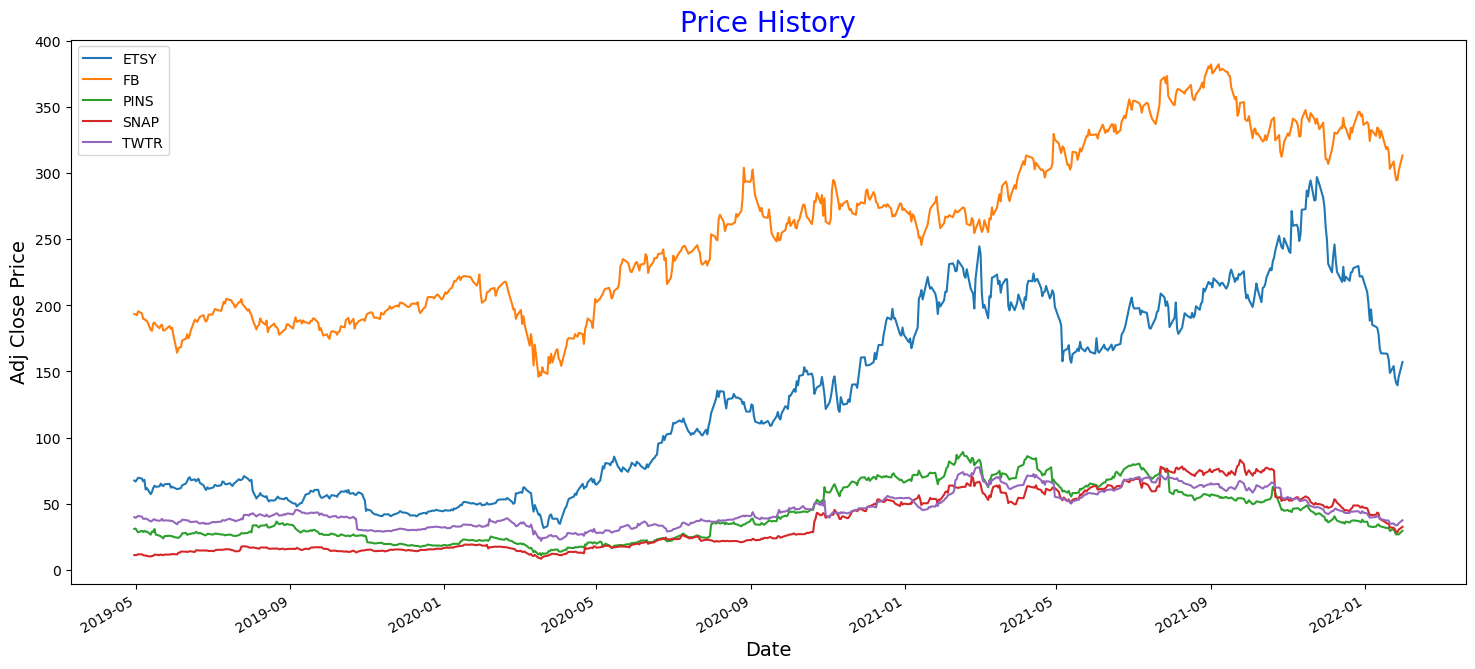

In [18]:
# Commencing data visuliazation efforts by importing matplotlib's 
# `pyplot` submodule into our Notebook:
import matplotlib.pyplot as plt
# `%matplotlib inline` "magic function" allows for inline display/
# storage of Matplotlib plots within Jupyter Notebook:
%matplotlib inline

# Instantiating figure with single AxesSubplot:
fig, axs = plt.subplots(1,1, figsize = (18,8))
# For each unique value in "Symbol" column in "commonSMData" Data-
# Frame, plotting every row whose value for "Symbol" column equals 
# the unique "symbol" value that our for-loop has currently iterated 
# to; additionally, using `label` attribute, utilizing unique "symbol" 
# values that our for-loop has iterated through to generate in-plot 
# legend of labels demarcating each stock's price history:
for symbol in commonSMData['Symbol'].unique():
    commonSMData.loc[commonSMData['Symbol'] == symbol, :].plot(
        ax = axs, y = 'Adj Close', x = 'Date', label = symbol
        )

# Setting plot labels:
axs.set_title('Price History', fontsize = 20, color = 'blue')
axs.set_xlabel('Date', fontsize = 14)
axs.set_ylabel('Adj Close Price', fontsize = 14)

The stocks of Twitter, Pinterest, and Snap Inc. also appear to have less growth potential than the stocks of Facebook and Etsy, but this cannot be soundly concluded based on the above visualization alone.

As such, we now prepare our data for visualization of cumulative return for each stock. We start by using the `.pivot()` method to reorganize the "commonSMData" DataFrame such that:
- The DataFrame's "Date" column becomes the index column for the resulting "commonSMPivot" DataFrame;
- The unique values in the "commonSMData" DataFrame's "Symbol" column become the column headers for the resulting "commonSMPivot" DataFrame; and
- The values in the "commonSMData" DataFrame's "Adj Close" column populate each column in the resulting "commonSMPivot" DataFrame in accordance with the stock whose daily adjusted close they represent.

An added benefit of our use of the `.pivot()` method is that it allows us to easily see each stock's adjusted close values for the beginning and ending of our time period (please see output of the below code cell).

In [19]:
commonSMPivot = commonSMData.pivot(index=['Date'], columns='Symbol', values=['Adj Close'])
# `commonSMPivot.columns.values` returns array of five tuples each containing 
# two elements: first element of every such tuple being "Adj Close" and second
# element being a unique ticker symbol contained within "commonSMData" DataFrame. 
# Therefore, `[col[1] for col in commonSMPivot.columns.values]` obtains second 
# element in each tuple and stores each such element in list whose elements are 
# assigned as column headers for each column in "commonSMPivot" DataFrame:
commonSMPivot.columns = [col[1] for col in commonSMPivot.columns.values]
commonSMPivot

,ETSY,FB,PINS,SNAP,TWTR
Date,,,,,
2019-04-30,67.540001,193.399994,30.980000,11.140000,39.910000
2019-05-01,66.790001,193.029999,31.230000,11.200000,39.290001
2019-05-02,68.070000,192.529999,29.740000,11.240000,39.950001
2019-05-03,69.650002,195.470001,28.360001,11.800000,40.799999
2019-05-06,69.029999,193.880005,29.500000,11.770000,40.230000
...,...,...,...,...,...
2022-01-25,145.130005,300.149994,28.459999,30.660000,34.169998
2022-01-26,141.300003,294.630005,26.740000,28.629999,33.619999
2022-01-27,139.539993,294.640015,26.879999,28.299999,33.840000


We calculate the percentage cumulative return for each stock using the beginning and ending adjusted close values for each stock found in the "commonSMPivot" DataFrame. Using the `.iloc[]` method, we retrieve the first value in each column (i.e., the adjusted close value for that stock on `2019-04-30`) and the last value in each column (i.e., the adjusted close value for that stock on `2022-01-31`). We then subtract the first value from the last value, divide the difference by the adjusted close for that stock on `2019-04-30`, and multiply the quotient by 100 to achieve a percentage cumulative return for each stock over our established time period.

The output of the code cell below quickly shows that Snap Inc., followed by Etsy and Facebook, have enjoyed the highest cumulative returns for our established time period. Equally important is the newly-gained knowledge that Pinterest and Twitter's stocks show negative cumulative return for our established time period (these details were not easily discernable from our price chart above).

In [20]:
cumulativeReturns = (
    (commonSMPivot.iloc[-1] - commonSMPivot.iloc[0]) / commonSMPivot.iloc[0]
    ) * 100

cumulativeReturns

ETSY    132.573289
FB       61.975191
PINS     -4.583603
SNAP    192.100538
TWTR     -6.013534
dtype: float64

We use `.pivot()` again on the "commonSMData" DataFrame in preparation for plotting the cumulative returns for each stock over our established time period. This time, however, we respectively populate each column in the resulting "commonSMPivotGraph" DataFrame with the values in the "commonSMData" DataFrame's "1d %Change" column.

In [21]:
commonSMPivotGraph = commonSMData.pivot(
    index=['Date'], columns='Symbol', values=['1d %Change']
    )

commonSMPivotGraph.columns = [col[1] for col in commonSMPivotGraph.columns.values]
commonSMPivotGraph

,ETSY,FB,PINS,SNAP,TWTR
Date,,,,,
2019-04-30,NaN,NaN,NaN,NaN,NaN
2019-05-01,-0.011105,-0.001913,0.008070,0.005386,-0.015535
2019-05-02,0.019165,-0.002590,-0.047711,0.003571,0.016798
2019-05-03,0.023211,0.015270,-0.046402,0.049822,0.021277
2019-05-06,-0.008902,-0.008134,0.040197,-0.002542,-0.013971
...,...,...,...,...,...
2022-01-25,-0.057964,-0.027728,-0.085182,-0.035849,-0.025385
2022-01-26,-0.026390,-0.018391,-0.060436,-0.066210,-0.016096
2022-01-27,-0.012456,0.000034,0.005236,-0.011526,0.006544


In [22]:
# Calculating daily cumulative percentage return for each column (i.e., 
# for each stock) using `.cumprod()`; viewing output:
cumReturnsGraph = (
    (1 + commonSMPivotGraph).cumprod() - 1
    ) * 100

cumReturnsGraph

,ETSY,FB,PINS,SNAP,TWTR
Date,,,,,
2019-04-30,NaN,NaN,NaN,NaN,NaN
2019-05-01,-1.110453,-0.191311,0.806972,0.538595,-1.553493
2019-05-02,0.784718,-0.449842,-4.002582,0.897661,0.100228
2019-05-03,3.124075,1.070324,-8.457066,5.924594,2.230016
2019-05-06,2.206097,0.248196,-4.777274,5.655297,0.801803
...,...,...,...,...,...
2022-01-25,114.880075,55.196486,-8.134282,175.224407,-14.382365
2022-01-26,109.209359,52.342303,-13.686249,157.001780,-15.760463
2022-01-27,106.603481,52.347479,-13.234346,154.039483,-15.209220


We now proceed to plot the daily cumulative returns for each stock on a single plot:

Text(0, 0.5, 'Cumulative Returns')

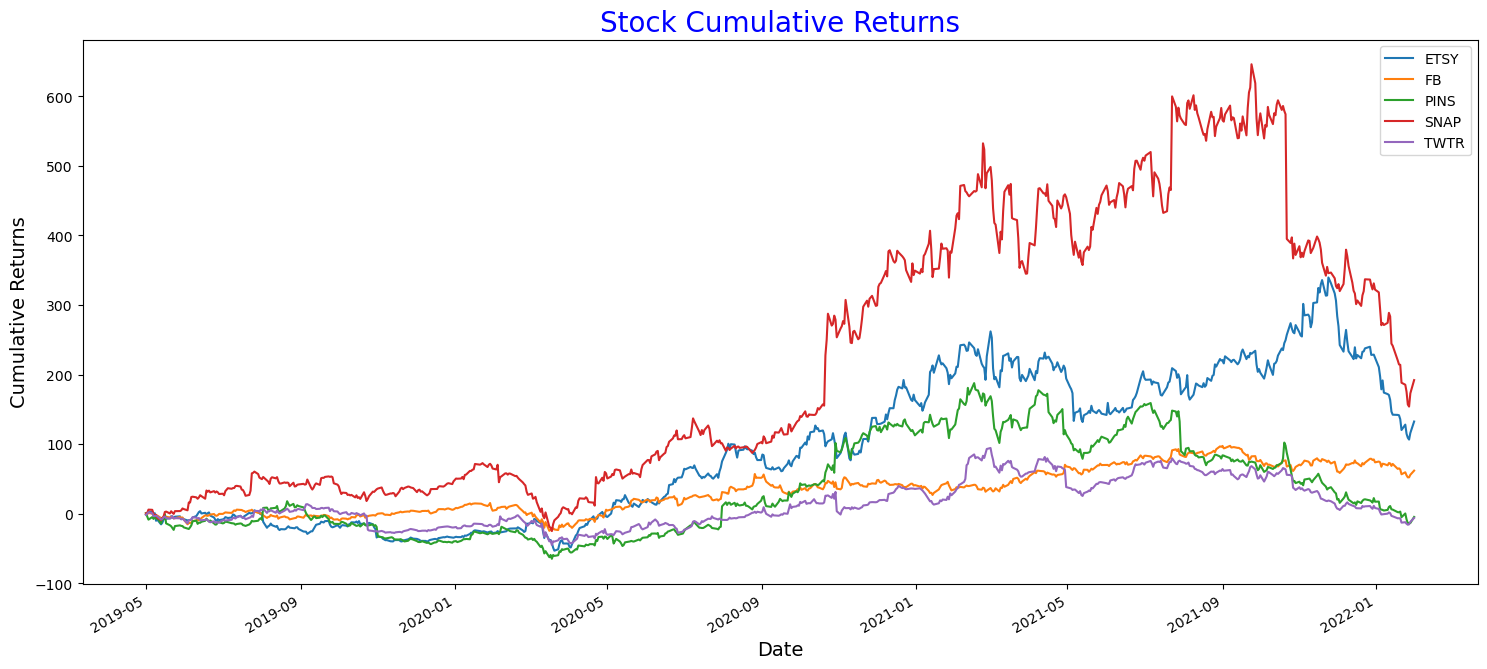

In [23]:
# Instantiating figure with single AxesSubplot:
fig, axs = plt.subplots(1,1, figsize = (18,8))
# Plotting values contained in "cumReturnsGraph" DataFrame:
cumReturnsGraph.plot(ax=axs)
# Setting plot labels:
axs.set_title('Stock Cumulative Returns', fontsize = 20, color = 'blue')
axs.set_xlabel('Date', fontsize = 14)
axs.set_ylabel('Cumulative Returns', fontsize = 14)

The visualization above supports our earlier calculations showing that Snap Inc. and Etsy enjoyed the highest cumulative returns over our established time period.

A remarkable observation from our plot is that around October of 2021, Snap Inc.'s stock had generated a cumulative return of over 600%. That said, by the end of our established time period, the stock's cumulative return had retreated to approximately 200%. Such a sharp decline in cumulative return over the course of three to four months suggests that Snap Inc.'s (and, to a lesser extent, Etsy's) stock is highly volatile. Such an observation may not have been so easily visible when looking at our previously-generated price history plot.

Now that we have visualized and explored each stock's price history and cumulative return, we will visualize dispersion of daily returns for each stock to obtain a better idea of its unique volatility:

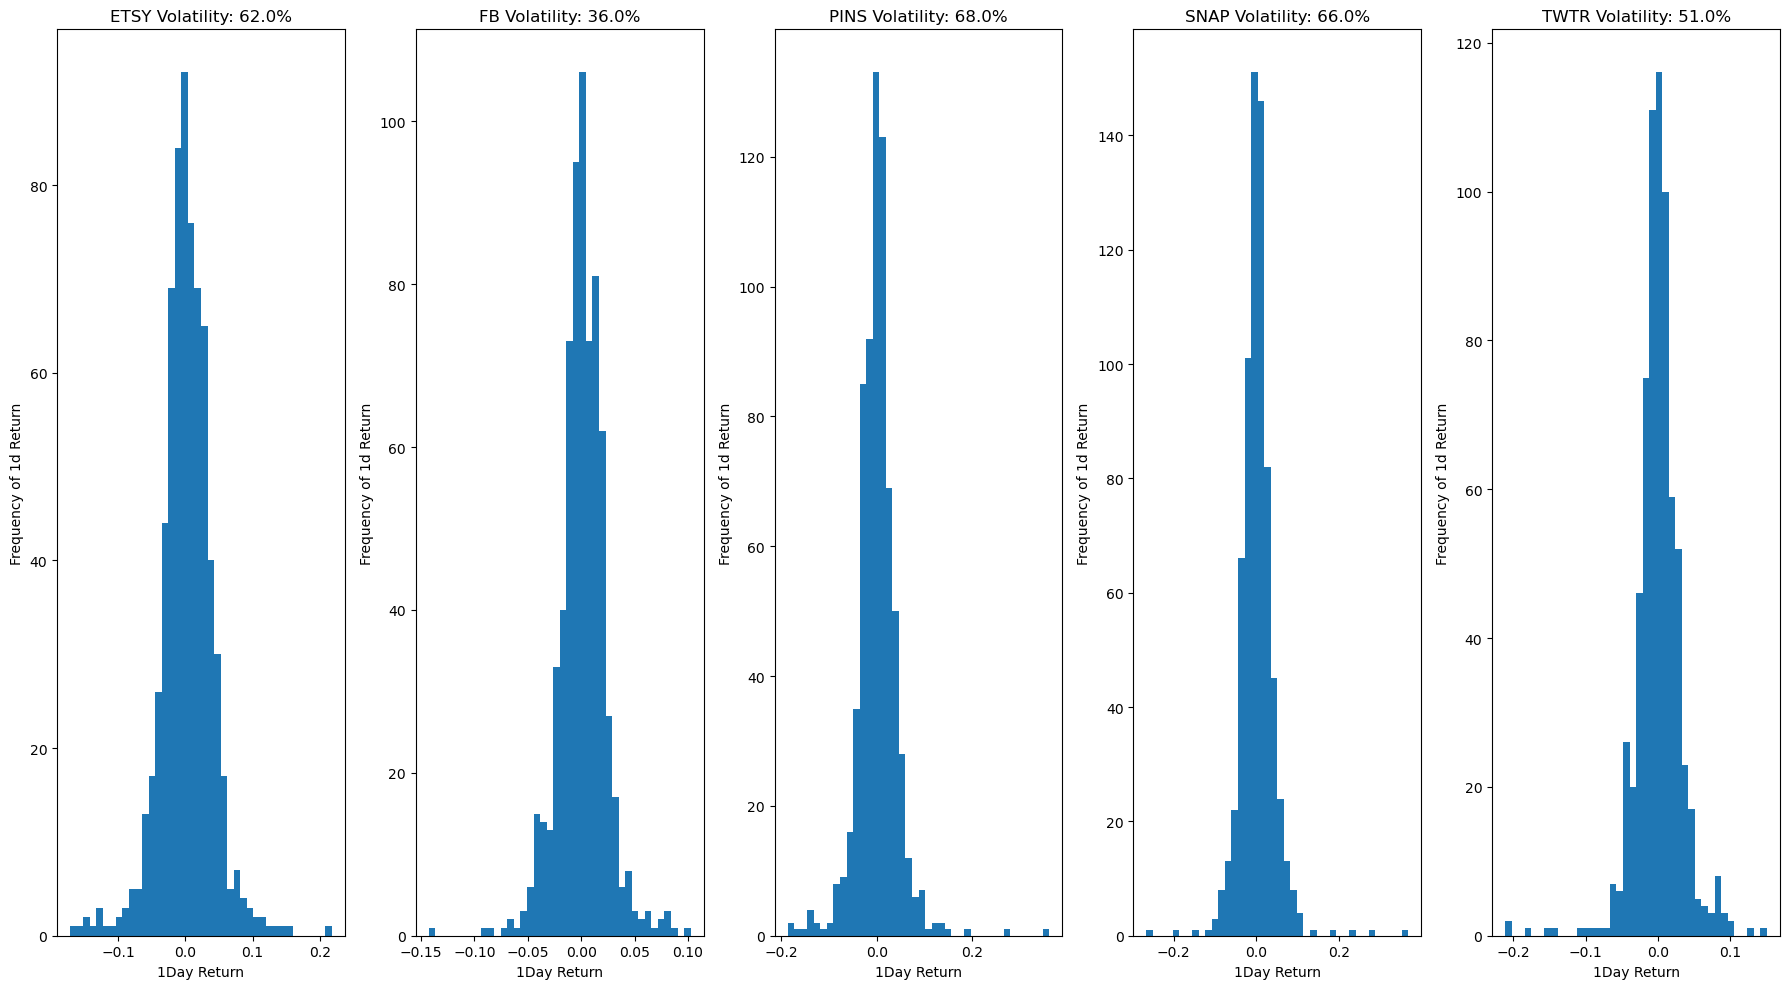

In [24]:
fig, axs = plt.subplots(1,5, figsize=(18,10))

# Using `zip()` function, simultaneously looping through each unique value contained 
# in "Symbol" column in "commonSMData" DataFrame as well as each AxesSubplot bound 
# to variable name "axs"; using `.flatten()` to return a one-dimensional NumPy array 
# of AxesSubplots that can be easily iterated-over:
for symbol, ax in zip(commonSMData['Symbol'].unique(), axs.flatten()):
    setSymbols = commonSMData.loc[commonSMData['Symbol'] == symbol, :]
    # Calculating annualized daily standard deviation of daily returns (assume 252 
    # trading days per year):
    volData = setSymbols['1d %Change'].std() * 252 ** 0.5
    roundedVolData = str(round(volData, 2) * 100)
    # Plotting histograms for each stock's volatility:
    volFigure = setSymbols['1d %Change'].plot(ax = ax, kind = 'hist', bins = 40)
    # Setting plot labels for each plot:
    ax.set_title(symbol + " "  + "Volatility:" + " " + roundedVolData + '%')
    ax.set_xlabel('1Day Return')
    ax.set_ylabel('Frequency of 1d Return')

# Using `.tight_layout()` to ensure outputted plots benefit visually from proper 
# spacing:
fig.tight_layout()

The histograms above demonstrate the distribution of daily returns for each stock. Visual analysis of the histograms yields the following takeaways:
- The stocks of Pinterest, Snap Inc., and Etsy display the highest volatility of returns;
- Snap Inc. and Pinterest's stocks appear to have more "outlier" returns (i.e., tails); and
- Facebook's stock shows the lowest volatility of all stocks in the group.

# Data Analysis

Based on our prospective investor's risk aversion and desire for moderate growth, as well as on our exploration and visualization of the available data thus far, our in-progress recommendation would be to invest in Facebook (FB).

Before finalizing this recommendation, however, we search for potential insights that might help in predicting Facebook's future price movement. In particular, we are interested in determining whether a 20-day exponential weighted moving average ("EWMA") might correlate well to Facebook's stock price at daily market close.

Since this regression analysis will be confined solely to Facebook, we retrieve all records from the "commonSMData" DataFrame relevant to Facebook's stock price over our established timeframe and store them in the resulting "priceFB" DataFrame:

In [25]:
priceFB = commonSMData.loc[commonSMData["Symbol"] == "FB", :]
priceFB.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,1d %Change
4688,2019-04-30,FB,193.399994,193.399994,197.389999,192.279999,194.190002,23494700.0,NaN
4693,2019-05-01,FB,193.029999,193.029999,196.179993,193.009995,194.779999,15996600.0,-0.001913
4698,2019-05-02,FB,192.529999,192.529999,194.000000,189.750000,193.000000,13209500.0,-0.002590
4703,2019-05-03,FB,195.470001,195.470001,196.160004,193.710007,194.380005,14575400.0,0.015270
4708,2019-05-06,FB,193.880005,193.880005,194.279999,190.550003,191.240005,13994900.0,-0.008134


We retrieve the values from the "Date" and "Adj Close" columns in the "priceFB" DataFrame and store them in the resulting "adjCloseFB" DataFrame. We then append a new column, "EWMA 20", to "adjCloseFB" and populate the column with the exponential weighted moving average for Facebook's stock for each day in our established time period.

In [26]:
adjCloseFB = priceFB.loc[:, ['Date', 'Adj Close']]
adjCloseFB['EWMA 20'] = adjCloseFB['Adj Close'].ewm(span = 20).mean()
adjCloseFB.head()

,Date,Adj Close,EWMA 20
4688,2019-04-30,193.399994,193.399994
4693,2019-05-01,193.029999,193.205746
4698,2019-05-02,192.529999,192.957616
4703,2019-05-03,195.470001,193.682903
4708,2019-05-06,193.880005,193.730580


As a quality check on our work, we plot both the adjusted close and the exponential weighted moving average ("EWMA") for Facebook's stock over our established time frame. The plot suggests that a 20-day EWMA tracks quite closely with the daily adjusted close for the timeframe.

Text(0.5, 1.0, 'Adj Close and Exp Moving Avg')

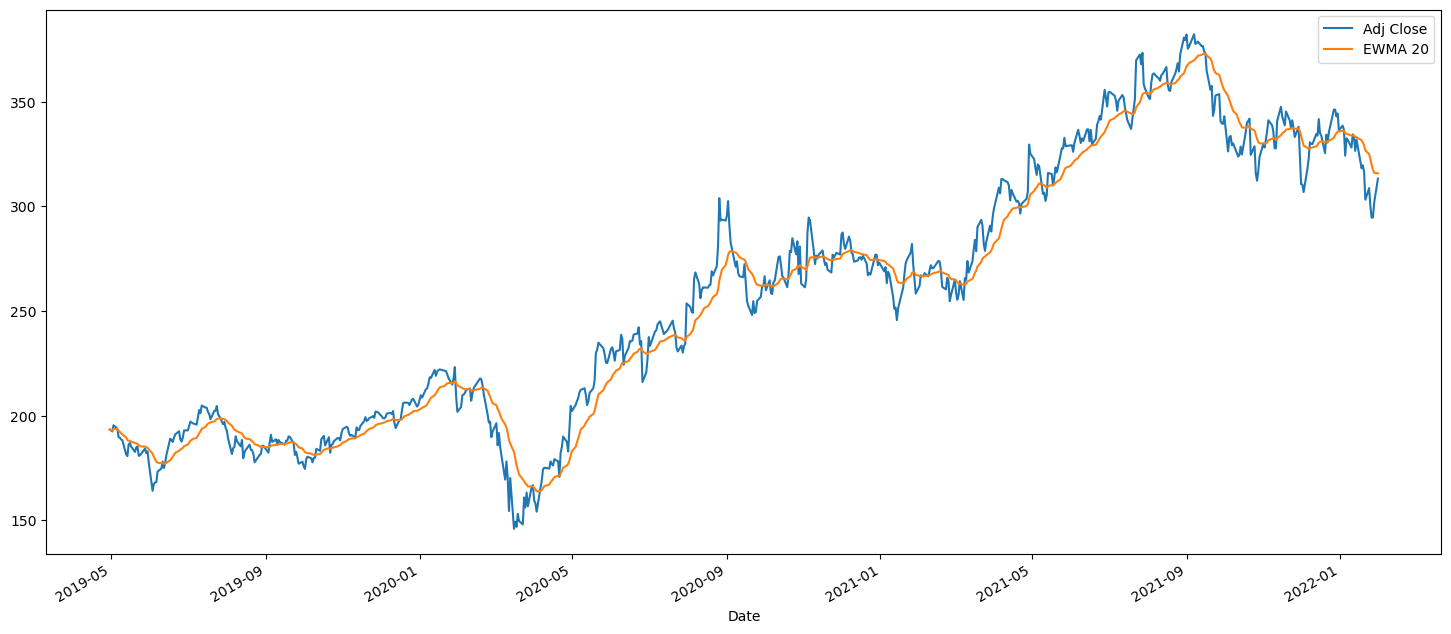

In [27]:
adjCloseFB.plot(x = 'Date', y = ['Adj Close', 'EWMA 20'], kind = 'line', figsize = (18,8))
ax.set_title('Adj Close and Exp Moving Avg', fontsize = 14)

We can now proceed in earnest to our regression analysis. We start by importing various tools from the `sklearn` library, assigning a predictor and predictand, and splitting our "adjCloseFB" DataFrame into a training dataset and a testing dataset:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Defining predictor (independent) and predictand (dependent) variables:
X = adjCloseFB[['Adj Close']]
Y = adjCloseFB[['EWMA 20']]

# Splitting data into training and testing datasets (implementing 80/20 train/test split):
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# For purposes of plotting predicted "x_train" and "x_test" values (respectively) as solid 
# black line in each scatter plot below, converting "x_train" DataFrame into "x_train_numpy" 
# NumPy array, and converting "x_test" DataFrame into "x_test_numpy" NumPy array:
x_train_numpy = x_train.values
x_test_numpy = x_test.values

# Viewing summary statistics for "x_test" and "x_train" DataFrames:
print(x_test.describe())
print(x_train.describe())

        Adj Close
count  140.000000
mean   259.075857
std     63.897123
min    149.729996
25%    194.287506
50%    259.099991
75%    322.637489
max    382.179993
        Adj Close
count  556.000000
mean   256.953993
std     62.123681
min    146.009995
25%    197.817497
50%    261.130005
75%    312.279999
max    382.049988


As shown in the output of the code cell above, our model will have 140 samples for testing and 556 samples for training.

We now proceed to fit our model to the training data and generate predictions on the testing data:

In [29]:
model = LinearRegression().fit(x_train, y_train)
pricePredicted = model.predict(x_test)
print(pricePredicted)

[[290.98998541]
 [189.58360241]
 [336.52352129]
 [234.80706438]
 [185.98860211]
 [217.61692499]
 [303.12191747]
 [197.5197558 ]
 [341.66893552]
 [264.81715067]
 [202.08377589]
 [170.02908844]
 [202.87835231]
 [276.4161418 ]
 [194.72903143]
 [270.91220045]
 [332.74440767]
 [168.74031   ]
 [209.75829378]
 [275.9316393 ]
 [320.16671202]
 [343.28718689]
 [251.13480468]
 [293.76132554]
 [217.1808757 ]
 [321.7946629 ]
 [264.88498812]
 [335.30259509]
 [179.09897591]
 [313.52905137]
 [368.76233684]
 [304.01341509]
 [204.79699287]
 [261.38686466]
 [363.40374033]
 [211.14396385]
 [329.87616112]
 [308.31579969]
 [361.6304446 ]
 [319.97292876]
 [178.40129112]
 [180.70752777]
 [299.55598613]
 [375.29342114]
 [176.19196088]
 [197.5197558 ]
 [188.49832153]
 [193.44993772]
 [274.96263429]
 [189.87430687]
 [350.1380594 ]
 [260.32098281]
 [230.65972412]
 [262.01674157]
 [261.58067749]
 [319.01359369]
 [328.86838764]
 [214.64207252]
 [302.91843469]
 [218.70220587]
 [260.10780052]
 [309.74990818]
 [273.63

We now plot the model's training data along with the model's _predictions_ of the training data's values. The predicted values are represented by the black line in the scatter plot below.

Without protecting from or testing for problematic phenomena such as overfitting, rudimentary visual analysis of the scatter plot suggests acceptable predictive accuracy when our model is applied to its training dataset.

/Users/Reid/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


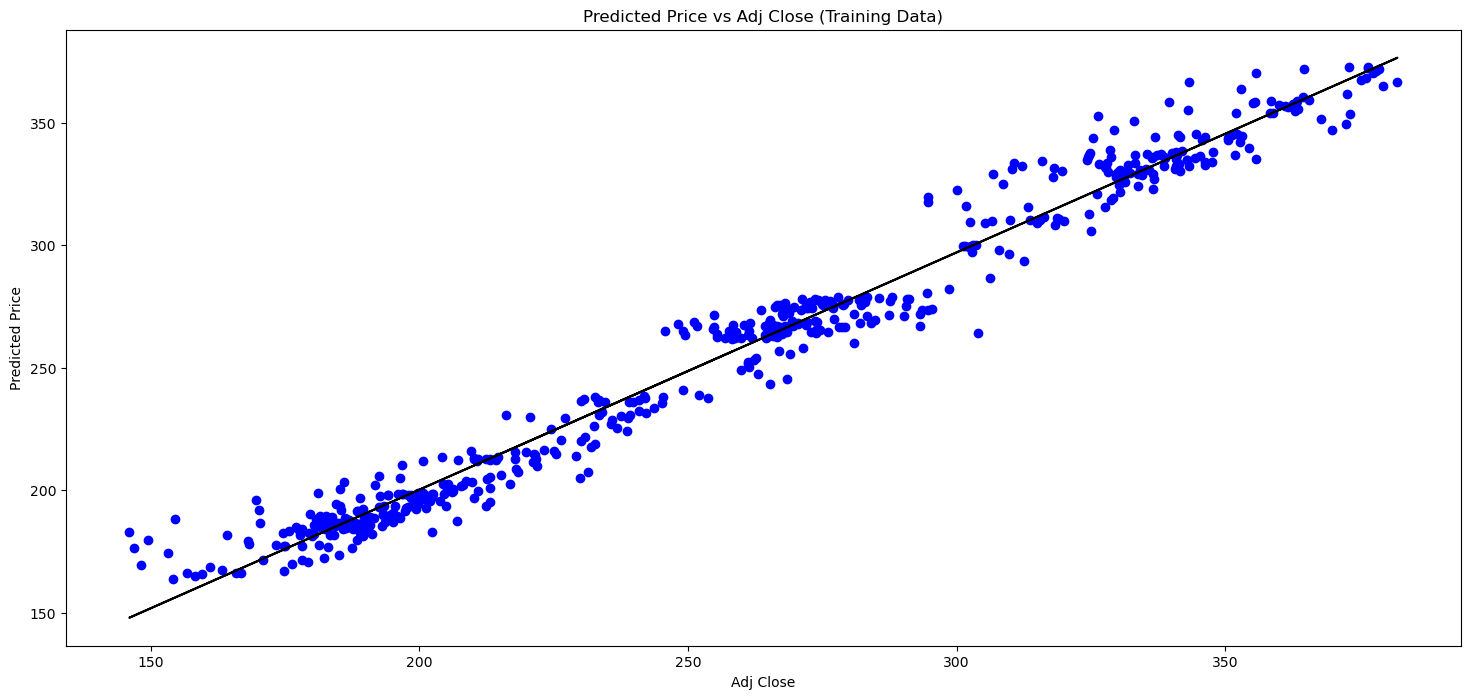

In [30]:
fig, axs = plt.subplots(1,1, figsize = (18,8))
# Plotting actual values from training dataset:
plt.scatter(x_train, y_train, color = 'blue')
# Plotting model's predicted values for training dataset:
plt.plot(x_train_numpy, model.predict(x_train_numpy), color = 'black')
# Setting plot labels:
plt.title('Predicted Price vs Adj Close (Training Data)')
plt.xlabel('Adj Close')
plt.ylabel('Predicted Price')
plt.show()

We now plot the model's testing data along with the model's _predictions_ of the testing data's values. The predicted values are represented by the black line in the scatter plot below.

Without protecting from or testing for problematic phenomena such as overfitting, rudimentary visual analysis of the scatter plot suggests acceptable predictive accuracy when our model is applied to its testing dataset.

/Users/Reid/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


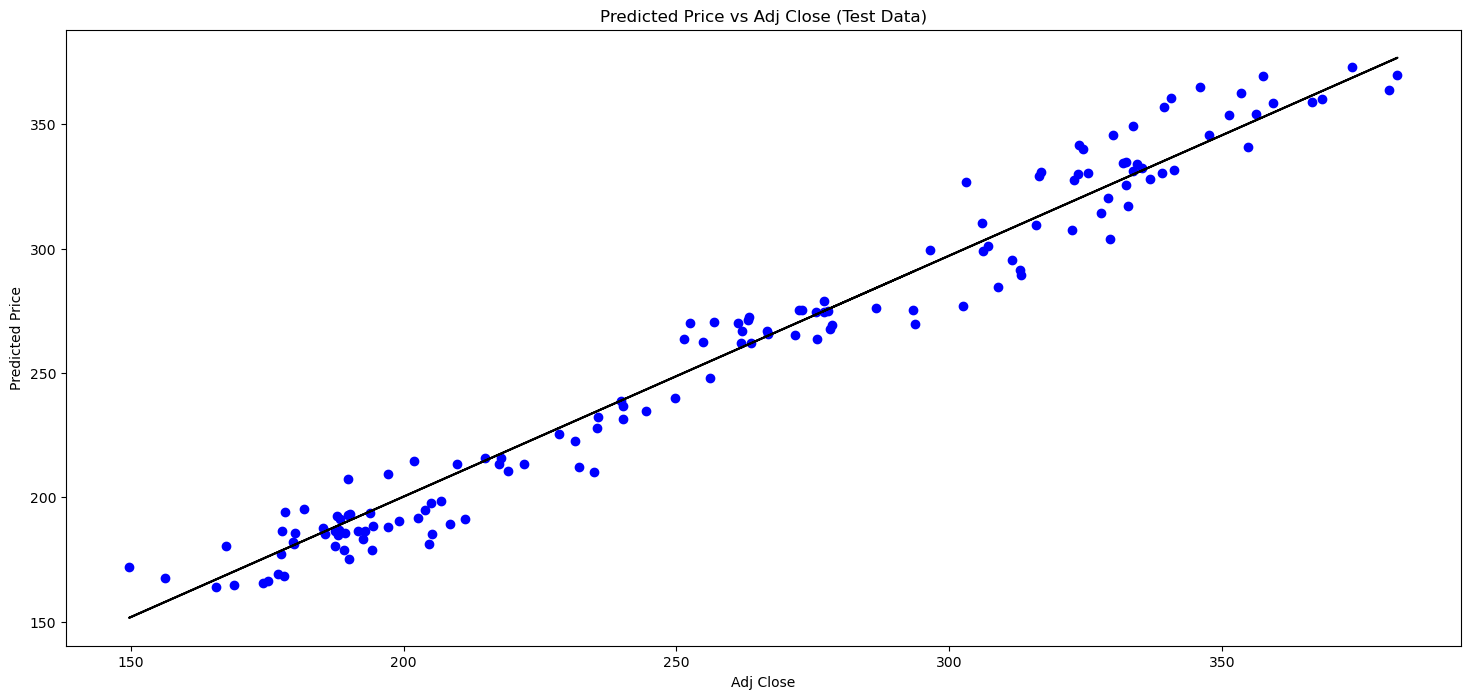

In [31]:
fig, axs = plt.subplots(1,1, figsize = (18,8))
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test_numpy, model.predict(x_test_numpy), color = 'black')
plt.title('Predicted Price vs Adj Close (Test Data)')
plt.xlabel('Adj Close')
plt.ylabel('Predicted Price')
plt.show()

As a quality check on our model, we compute the model coefficient, mean absolute error, and coefficient of determination:

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printing results for each metric:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, pricePredicted))
print("Coefficient of Determination:", r2_score(y_test, pricePredicted))

Model Coefficients: [[0.96900501]]
Mean Absolute Error: 9.026628239549453
Coefficient of Determination: 0.9695528070345956


For all intents and purposes, the lower a model's mean absolute error, the better. Keeping this in mind, the mean absolute error value of ~9 for our model - _given input adjusted closing price values ranging from approximately 146 dollars to 382 dollars within a comparatively small dataset_ - seems comparatively low.

Additionally, the closer a given model's coefficient of determination is to 1, the beter. As such, our model's coefficient of determination of ~.97 bodes well in assessment of the model's overall worth.

Both metrics indicate that our model fits the data well and that the 20-day exponential weighted moving average ("EWMA") based on Facebook's adjusted closes for the established timeframe _could potentially_ be a good predictor or indicator of the stock's close prices.

## Recommendation

Our analyses and visualizations now concluded and examined, the project team has deliberated and come to the conclusion that Facebook (FB) best fits our potential investor's profile and investment goals.

As demonstrated in the "Price History" plot, Facebook has continually traded at the highest price over the common timeframe while displaying a general upward trend in price movement, suggesting long-term price durability with potential for significant continuing growth. Additionally, while Facebook's cumulative return rate over the analysis time period has not been as meteoric as that of Snap Inc. and Etsy, Facebook's stock has still returned an impressive 61% for the period and remained relatively stable while Etsy and (particularly) Snap Inc.'s respective cumulative returns collapsed around October 2021. Furthermore, as evidenced by the per-stock volatility histograms at the end of the "Data Visualization" section, Facebook's stock shows the lowest volatility of all stocks in the dataset.

Lastly, the predictive accuracy of our regression model trained on Facebook stock data may suggest that, notwithstanding any potentially catastrophic events Facebook-specific (cyberattacks, infrastructure failure, PR crises, etc.) or market-wide (war, natural disaster, global economic depression, etc.), Facebook's share price is relatively predictable and highly resistant to market fluctuations.

While our potential investor is most-focused on short-/mid-term returns from their social media investment, they have expressed secondary interest in selecting their stock on the basis of long-term potential returns. Our analyses were limited in this respect in that the five stocks in question had only 2.5 years' worth of data recorded over a shared timeframe. In the future, it would likely prove insightful to perform these analyses again when a longer period of shared stock data were available for these five equities, as this could provide greater insight as to the prospects for cumulative return for each stock over the long-term.